In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
%matplotlib inline
df=pd.read_csv('Walmart.csv')
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [3]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [4]:
df['Date'] = pd.to_datetime(df['Date'])
df['Day'] = df['Date'].dt.weekday
df['Month'] = df['Date'].dt.month
df['Year']  = df['Date'].dt.year
df.drop('Date',axis=1,inplace=True)
df.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,6,5,2010
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,3,12,2010
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,4,2,2010
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,4,2,2010
4,1,1554806.68,0,46.50,2.625,211.350143,8.106,0,5,2010


In [5]:
df.isnull().sum()

Store           0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
Day             0
Month           0
Year            0
dtype: int64

In [6]:
df.shape

(6435, 10)

In [7]:
df12= df.copy()

In [8]:
# converting days and months from numerics to categories
days = {0:'Sunday',1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thursday',5: 'Friday',6:'Saturday'}
df['Day'] = df['Day'].map(days)
months={1:'January',2:'February',3:'March',4:'April',5:'May',6:'June',7:'July',8:'August',9:'September',10:'October',11:'Novemenber',12:'December'}
df['Month']= df['Month'].map(months)
df.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,Saturday,May,2010
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,Wednesday,December,2010
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,Thursday,February,2010
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,Thursday,February,2010
4,1,1554806.68,0,46.50,2.625,211.350143,8.106,Sunday,May,2010


In [9]:
for i in ['Store','Fuel_Price','Unemployment','Day','Month','Year']:
    print(f'{i}: {df[i].nunique()}')

Store: 45
Fuel_Price: 892
Unemployment: 349
Day: 7
Month: 12
Year: 3


D:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Year', ylabel='count'>

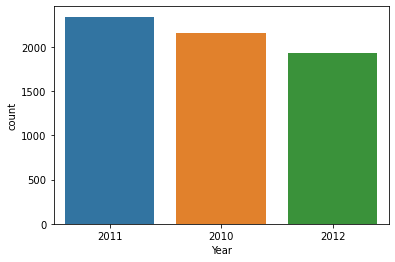

In [10]:
sns.countplot(df['Year'],order=df['Year'].value_counts().index)

D:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Day', ylabel='count'>

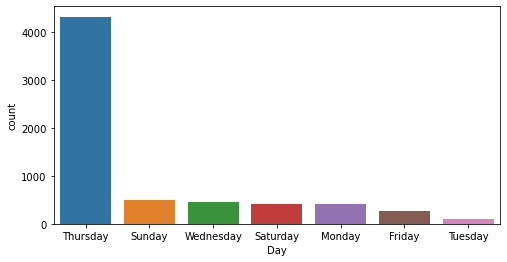

In [11]:
plt.figure(figsize=(8,4))
sns.countplot(df['Day'],order=df['Day'].value_counts().index)

D:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Month', ylabel='count'>

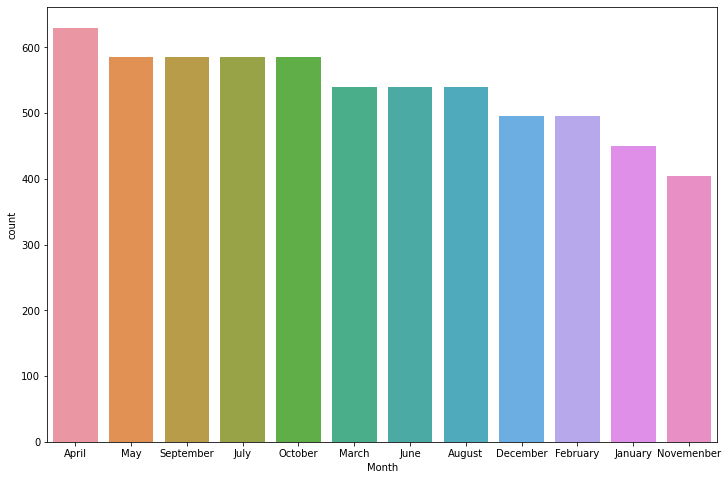

In [12]:
plt.figure(figsize=(12,8))
sns.countplot(df['Month'],order= df['Month'].value_counts().index)

In [13]:
df.groupby('Year')['Weekly_Sales'].sum()

Year
2010    2.288886e+09
2011    2.448200e+09
2012    2.000133e+09
Name: Weekly_Sales, dtype: float64

Text(0.5, 1.0, 'Annual Sales')

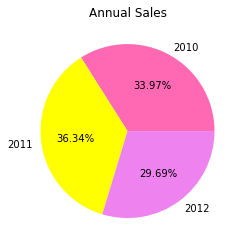

In [14]:
plt.pie(df.groupby('Year')['Weekly_Sales'].sum(),labels=df['Year'].unique(),normalize=True,autopct='%1.2f%%',colors=['hotpink','yellow','violet'])
plt.title('Annual Sales')

In [15]:
df2 = df.groupby('Day')['Weekly_Sales'].sum().reset_index()
df2.head(10)

,Day,Weekly_Sales
0,Friday,2.824947e+08
1,Monday,4.335075e+08
2,Saturday,4.266091e+08
3,Sunday,5.390133e+08
4,Thursday,4.486257e+09
5,Tuesday,9.271282e+07
6,Wednesday,4.766244e+08


([<matplotlib.patches.Wedge at 0x1eea21412e0>,
 [Text(1.0904699850328354, 0.14448256553123598, 'Friday'),
  Text(0.9829060316235633, 0.4938580089438856, 'Monday'),
  Text(0.7120974620854462, 0.8384015771045916, 'Saturday'),
  Text(0.2762389849519859, 1.0647497467446032, 'Sunday'),
  Text(-0.9553304829562036, -0.5452922778975208, 'Thursday'),
  Text(0.9717354970821146, -0.5154901780932163, 'Tuesday'),
  Text(1.0729438350515599, -0.24246964103749427, 'Wednesday')],
 [Text(0.5948018100179102, 0.0788086721079469, '4.19%'),
  Text(0.5361305627037617, 0.2693770957875739, '6.43%'),
  Text(0.3884167975011525, 0.457309951147959, '6.33%'),
  Text(0.15067580997381047, 0.5807725891334199, '8.00%'),
  Text(-0.5210893543397473, -0.2974321515804658, '66.59%'),
  Text(0.5300375438629715, -0.2811764607781179, '1.38%'),
  Text(0.5852420918463053, -0.13225616783863323, '7.07%')])

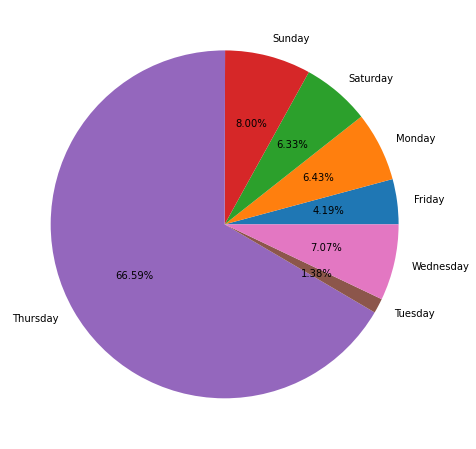

In [16]:
plt.figure(figsize=(10,8))
plt.pie(df2['Weekly_Sales'],labels= df2['Day'],autopct='%1.2f%%', normalize=True)

In [17]:
df3 = df.groupby('Month')['Weekly_Sales'].sum().reset_index()

df3.head()

,Month,Weekly_Sales
0,April,6.453239e+08
1,August,5.642317e+08
2,December,5.990761e+08
3,February,5.220257e+08
4,January,4.264263e+08


([<matplotlib.patches.Wedge at 0x1eea21b12b0>,
 [Text(1.0505715420703448, 0.3260359412579202, 'April'),
  Text(0.7135560893168025, 0.8371605027704733, 'August'),
  Text(0.17894470808660848, 1.0853473137423792, 'December'),
  Text(-0.38685422481986037, 1.0297299688457286, 'February'),
  Text(-0.7903461501230193, 0.7650836313670042, 'January'),
  Text(-1.0529134511925988, 0.3183916837759601, 'July'),
  Text(-1.0654902855032773, -0.27336870980078276, 'June'),
  Text(-0.7840328017971336, -0.7715520499008066, 'March'),
  Text(-0.2752227535923998, -1.0650128806286887, 'May'),
  Text(0.26538381737518074, -1.0675071098008562, 'Novemenber'),
  Text(0.7408373645676252, -0.8131174572351131, 'October'),
  Text(1.0585579767623141, -0.29909030380952856, 'September')],
 [Text(0.5730390229474608, 0.1778377861406837, '9.58%'),
  Text(0.3892124123546195, 0.4566330015111672, '8.37%'),
  Text(0.09760620441087733, 0.5920076256776613, '8.89%'),
  Text(-0.21101139535628746, 0.5616708920976701, '7.75%'),
  Te

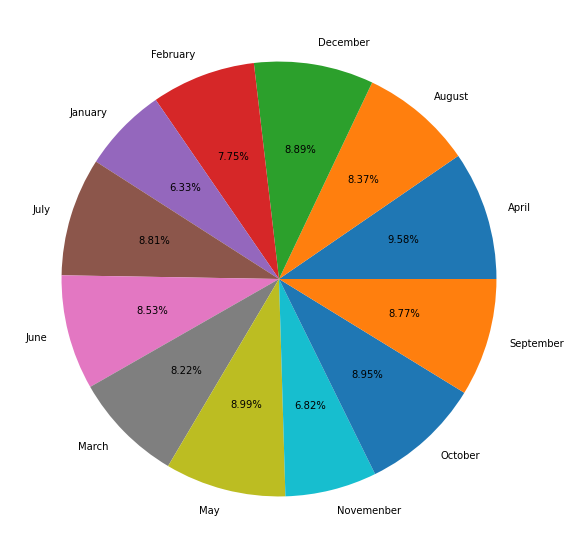

In [18]:
plt.figure(figsize=(10,10))
plt.pie(df3['Weekly_Sales'],labels=df3['Month'],normalize=True,autopct='%1.2f%%')

([<matplotlib.patches.Wedge at 0x1eea223b7f0>,
 [Text(-0.25679386593526243, -1.0696059603508306, 'Non Special Holiday Week'),
  Text(0.3268284610531304, 1.361316699760068, 'Special Holiday Week')],
 [Text(-0.14006938141923403, -0.5834214329186348, '92.50%'),
  Text(0.2101040106770124, 0.8751321641314721, '7.50%')])

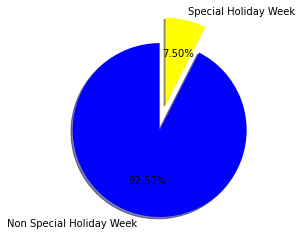

In [19]:
df4 = df.groupby('Holiday_Flag')['Weekly_Sales'].sum().reset_index()
plt.pie(df4['Weekly_Sales'],labels= ['Non Special Holiday Week','Special Holiday Week'],normalize=True,autopct='%1.2f%%',startangle=90,explode=[0,0.3],shadow=True,colors=['blue','yellow'])

# Висновки зі спостережень

У 2011 році було зафіксовано найбільшу кількість продажів, потім йдуть 2010 і 2012 роки.
Більше 50% продажів припадає на четвер.
Найвищі продажі зафіксовані в квітні, потім йдуть травень, жовтень, грудень, вересень, але різниця у них незначна.
Більшість продажів відбувається у неособливі тижні, без свят, можливо, тому що люди роблять свої покупки раніше, щоб відсвяткувати особливі свята.

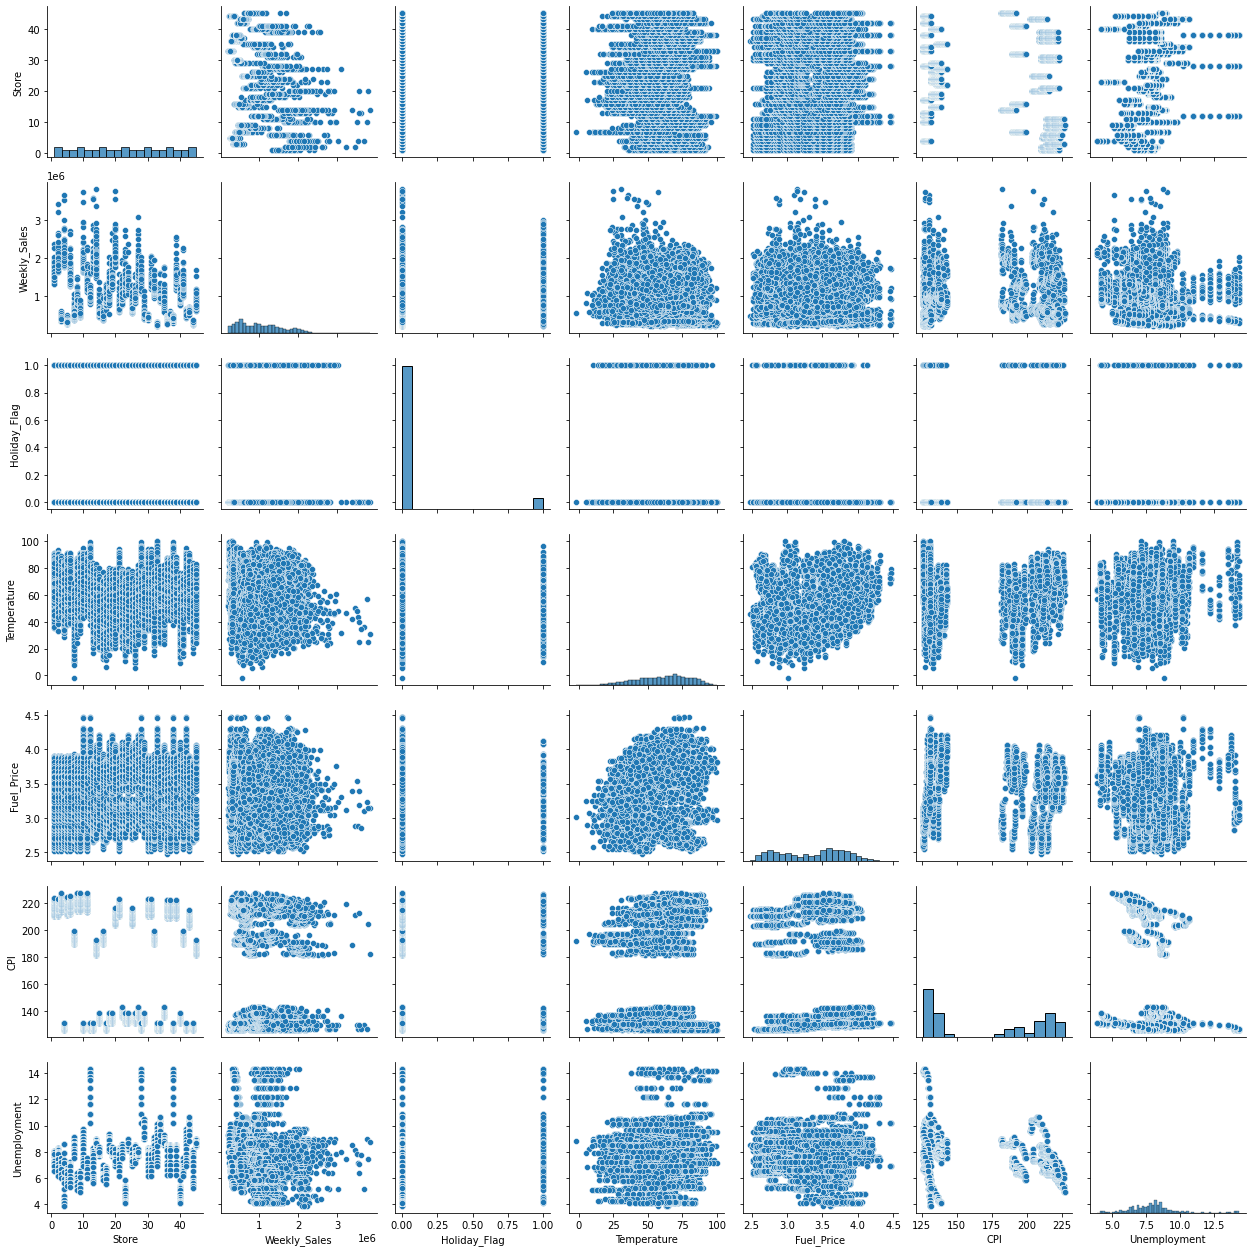

In [20]:
import matplotlib.pyplot as plot
import seaborn as sns

colums=['Store','Weekly_Sales','Holiday_Flag','Temperature','Fuel_Price','CPI','Unemployment']
sns.pairplot(df[colums])
plt.tight_layout()
plt.show()

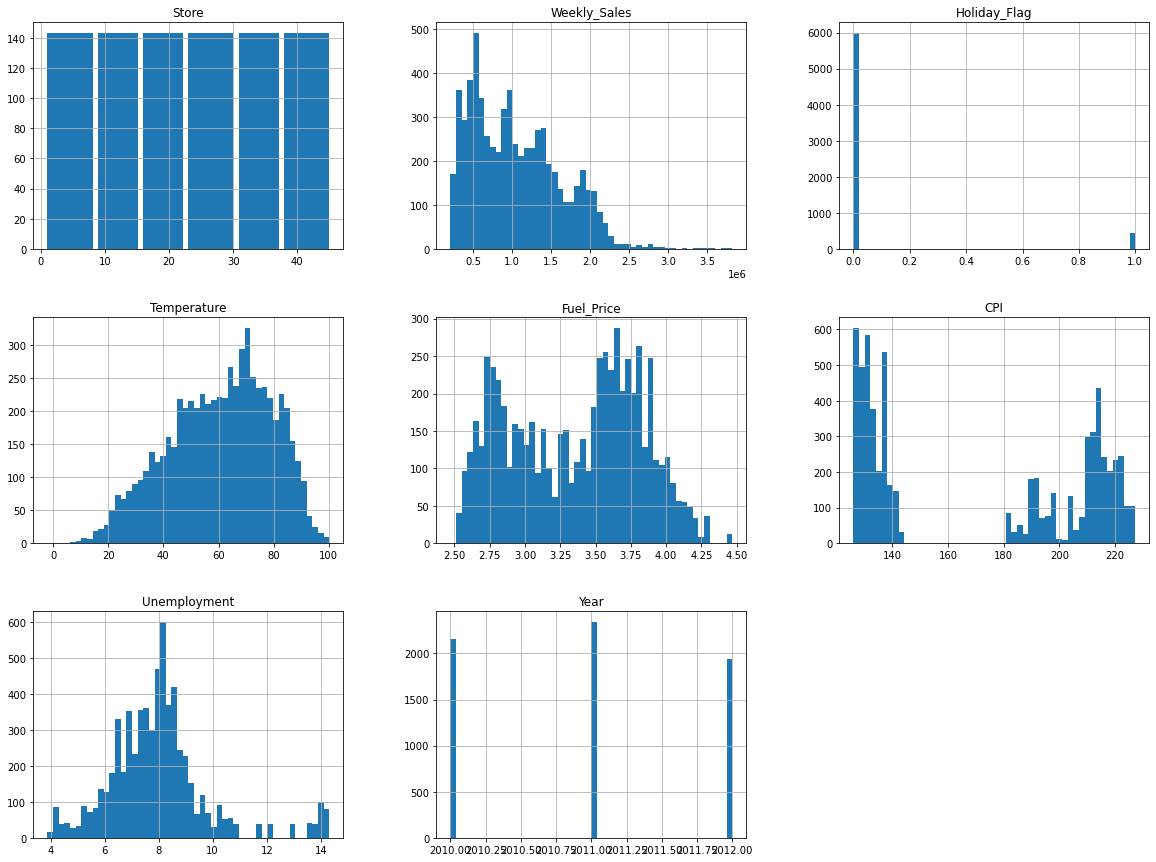

In [21]:
df.hist(bins=50,figsize=(20,15))
plt.show()

# Custom Linear regression

In [22]:
def load_datasets(filename, column_list, target_column):
    
    df1 = pd.read_csv(filename, delimiter=',')
    X, y = df[column_list].values, df[target_column].values
    return X, y, df1

In [23]:
def split_datasets(X, y, test_size = 0.2):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    return X_train, X_test, y_train, y_test

In [24]:
def normalize(X):
    mean = np.mean(X,axis=0)
    std = np.std(X,axis=0)
    X_new = (X - mean) / std
    return X_new, mean, std

In [25]:
def prepare_X(X):
    m = X.shape[0]
    ones = np.ones((m, 1))
    X_new = np.array(X[:])
    X_new = np.column_stack((ones, X_new))
    return X_new

In [26]:
def hypothesis(X, theta):
    h_thetha = np.dot(X, theta)
        
    return h_thetha

In [27]:
def cost_function(X, y, theta):
    m = X.shape[0]
    if m == 0:
        return None
    
    J = (1/(2*m)) * np.sum((hypothesis(X, theta) - y)**2, axis=0)
    
    return J

In [28]:
def derivative(X, y, theta):
    m = X.shape[0]
    
    d_thetha = np.dot(hypothesis(X, theta) - y, X) / m
    
    return d_thetha

In [29]:
def gradient_descent(X, y, theta, alpha, num_iters, print_J = True):
    m = X.shape[0]
    J_history = []
    J = cost_function(X, y, theta)
    if print_J == True:
        print(J)
    J_history.append(J)
    for i in range(num_iters):
        delta = alpha*derivative(X, y, theta)
        theta = theta - delta
        J = cost_function(X, y, theta)
        if print_J == True:
            print(J)
        J_history.append(J)
    return theta, J_history

In [30]:
colums=['Store','Holiday_Flag','Temperature','Fuel_Price','CPI','Unemployment']
target_col='Weekly_Sales'
X, y, data = load_datasets('Walmart.csv',colums, target_col)
print('Dataset: X={}, y={}'.format(X.shape, y.shape))

Dataset: X=(6435, 6), y=(6435,)


In [31]:
test_size = 0.2 
X_train, X_test, y_train, y_test = split_datasets(X, y, test_size)
print('Training set: X={}, y={}'.format(X_train.shape, y_train.shape))
print('Test set: X={}, y={}'.format(X_test.shape, y_test.shape))

Training set: X=(5148, 6), y=(5148,)
Test set: X=(1287, 6), y=(1287,)


In [32]:
X_train_norm, mean, std = normalize(X_train)
X = prepare_X(X_train_norm)
theta = np.array([0, 0,0,0,0,0,0])

In [33]:
print(X_train_norm)

[[-0.76454281 -0.28029795 -1.03065739 -1.1868183  -1.13624224  0.17256109]
 [-1.45833205 -0.28029795 -0.03562165  0.75023282 -1.02888813 -1.79749505]
 [-0.68745511  3.56763227 -1.27385216  0.60408144  0.46861687  0.22992589]
 ...
 [-1.07289358 -0.28029795  0.3052853  -1.21081331  1.08643928 -0.85363154]
 [ 1.31682492  3.56763227  0.12397492 -1.40931742 -0.97979672 -1.41559417]
 [-1.14998127 -0.28029795 -0.80483368 -1.6100029   1.1047883  -0.89877977]]


In [34]:
y = y_train[:]

In [35]:
print(cost_function(X, y, theta))

707654852906.23


In [36]:
alpha = 0.01
num_iters = 1500

In [37]:
new_theta, Js = gradient_descent(X, y, theta, alpha, num_iters, False)
print(new_theta)

[1047927.37029959 -198804.91368568   25107.80657271  -12624.89459008
    6971.7467471   -91229.52729749  -40948.48930056]


In [38]:
X_test, mean, std=normalize(X_test)
X_test_proc = prepare_X(X_test)
y_test_pred = hypothesis(X_test_proc, new_theta)

rel_diff = np.abs(np.divide(y_test - y_test_pred, y_test)) * 100

res = pd.DataFrame({ 'y_actual' : y_test, 'y_pred' : y_test_pred, 'err' : rel_diff})
print(res)
print(cost_function(X_test_proc, y_test, new_theta))
print(f'MSE: {mean_squared_error(y_test,y_test_pred)}')
print(f'MAE: {mean_absolute_error(y_test,y_test_pred)}')
print(f'RMSE : {np.sqrt(mean_squared_error(y_test,y_test_pred))}')

        y_actual        y_pred         err
0      289201.21  8.536068e+05  195.160192
1     1451782.16  1.214868e+06   16.318878
2     1896873.99  1.137242e+06   40.046528
3      418925.47  1.263547e+06  201.616119
4     1969360.72  1.147075e+06   41.753966
...          ...           ...         ...
1282   953495.48  9.469547e+05    0.685983
1283   916820.96  1.210913e+06   32.077390
1284  1459655.85  9.361989e+05   35.861669
1285   502918.18  7.282867e+05   44.812157
1286   460020.74  7.275643e+05   58.159024

[1287 rows x 3 columns]
137745788667.6151
MSE: 275491577335.2302
MAE: 434748.19434172753
RMSE : 524872.9154140364


Застосування Power Transformation до числових стовпців

In [39]:
cols =['Temperature','Fuel_Price','CPI','Unemployment']
df_numeric = df[cols]
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(standardize=True)
df_transformed = pd.DataFrame(pt.fit_transform(df_numeric),columns=cols)

pd.DataFrame({'cols':cols, 'box-cox lamda': pt.lambdas_})

for col in cols:
    df[col] = df_transformed[col]
    
    
df.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year
0,1,1643690.90,0,-1.017966,-1.683544,1.006528,0.185804,Saturday,May,2010
1,1,1641957.44,1,-1.204376,-1.732738,1.009450,0.185804,Wednesday,December,2010
2,1,1611968.17,0,-1.135341,-1.802251,1.010391,0.185804,Thursday,February,2010
3,1,1409727.59,0,-0.799809,-1.706104,1.011002,0.185804,Thursday,February,2010
4,1,1554806.68,0,-0.806467,-1.574543,1.011613,0.185804,Sunday,May,2010


In [40]:
tge= {'Sunday':5,'Monday':3, 'Tuesday':0, 'Wednesday':4, 'Thursday':6,  'Friday':1,'Saturday':2}
df['Day'] = df['Day'].map(tge)
yr = {2010:1, 2011:2, 2012:0}
df['Year'] = df['Year'].map(yr)
mn = {'January':1,'February':3,'March':4,'April':12,'May':11,'June':6,'July':8,'August':5,'September':7,'October':10,'Novemenber':2,'December':9}
df['Month'] = df['Month'].map(mn)
df.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year
0,1,1643690.90,0,-1.017966,-1.683544,1.006528,0.185804,2,11,1
1,1,1641957.44,1,-1.204376,-1.732738,1.009450,0.185804,4,9,1
2,1,1611968.17,0,-1.135341,-1.802251,1.010391,0.185804,6,3,1
3,1,1409727.59,0,-0.799809,-1.706104,1.011002,0.185804,6,3,1
4,1,1554806.68,0,-0.806467,-1.574543,1.011613,0.185804,5,11,1


In [41]:
X = df.drop(['Weekly_Sales'],axis=1)
Y = df['Weekly_Sales']

In [42]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [43]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
transformer = ColumnTransformer(transformers=[('tf',OneHotEncoder(sparse=False,drop='first'),['Store'])],remainder='passthrough')

In [44]:
X_train= transformer.fit_transform(X_train)
X_test = transformer.transform(X_test)

# Feature Selection

Text(0.5, 1.0, 'Correlation Matrix')

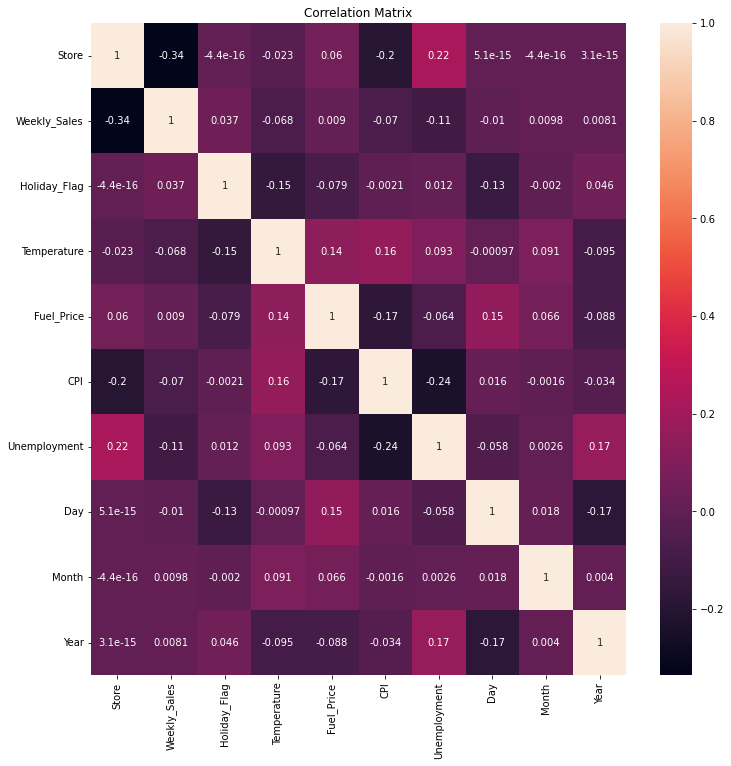

In [45]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),annot=True)
plt.title('Correlation Matrix')

In [46]:
def pred_model(model,X_train,Y_train,X_test,Y_test):
    c = model()
    c.fit(X_train,Y_train)
    y_pred = c.predict(X_test)
    print(model)    
    print(f'MSE: {mean_squared_error(Y_test,y_pred)}')
    print(f'MAE: {mean_absolute_error(Y_test,y_pred)}')
    print(f'RMSE : {np.sqrt(mean_squared_error(Y_test,y_pred))}')

    




pred_model(LinearRegression,X_train,Y_train,X_test,Y_test)

<class 'sklearn.linear_model._base.LinearRegression'>
MSE: 25057464430.706543
MAE: 91359.14504195968
RMSE : 158295.497190244
